In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import motionquant as mq
import matplotlib.pyplot as plt

filename = "results.h5"
items = mq.inspect_result(filename)
items

['01a_DSM639_SyS_CM_Cell_1',
 '01a_DSM639_SyS_CM_Cell_11',
 '01a_DSM639_SyS_CM_Cell_19',
 '01a_DSM639_SyS_CM_Cell_2',
 '01a_DSM639_SyS_CM_Cell_21',
 '01a_DSM639_SyS_CM_Cell_24',
 '01a_DSM639_SyS_CM_Cell_25',
 '01a_DSM639_SyS_CM_Cell_4',
 '01a_DSM639_SyS_CM_Cell_7',
 '01a_DSM639_SyS_CM_Cell_8',
 '01a_DSM639_SyS_CM_Cell_9',
 '01a_DSM639_SyS_CM_reg_Cell_0',
 '01a_DSM639_SyS_CM_reg_Cell_10',
 '01a_DSM639_SyS_CM_reg_Cell_11',
 '01a_DSM639_SyS_CM_reg_Cell_2',
 '01a_DSM639_SyS_CM_reg_Cell_9',
 '01a_DSM639_SyS_CM_start_reg_Cell_0',
 '01a_DSM639_SyS_CM_start_reg_Cell_15',
 '01a_DSM639_SyS_CM_start_reg_Cell_23',
 '01a_DSM639_SyS_CM_start_reg_Cell_24',
 '01a_DSM639_SyS_CM_start_reg_Cell_25',
 '01a_DSM639_SyS_CM_start_reg_Cell_7',
 '01a_DSM639_SyS_CM_start_reg_Cell_8']

In [ ]:
fig, ax = plt.subplots(len(items), 6, figsize=(20, 50))
for k, name in enumerate(items):
    try:
        img, mask, position, speed, diff, flow, rho, div = mq.load_result(
            filename, name
        )
        mq.figure(ax[k, :], name, img, mask, position, speed, diff, flow, rho, div)
    except Exception as e:
        print(f"error for {name}")
        print(e)
        pass
plt.savefig("figure.pdf")

Inspect a single strip

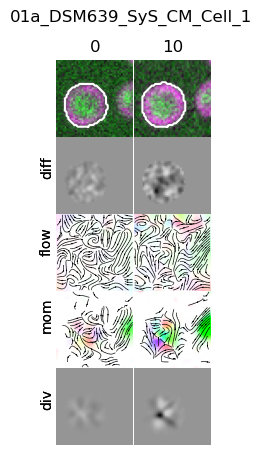

In [7]:
name = items[0]
img, mask, position, speed, diff, flow, rho, div = mq.load_result(filename, name)
mq.strip(
    name,
    img[:20],
    mask,
    position,
    speed,
    diff,
    flow,
    rho,
    div,
    "Greys",
    step=10,
    quiver=False,
)

Save all strips as individual pdf files

In [ ]:
for name in items:
    img, mask, position, speed, diff, flow, rho, div = mq.load_result(filename, name)
    mq.strip(
        name,
        img[:400],
        mask,
        position,
        speed,
        diff,
        flow,
        rho,
        div,
        "Greys",
        step=10,
        quiver=False,
    )
    plt.savefig(f"strip {name}.pdf")

Visualize the image and mask using napari

In [48]:
vector = mq.make_vector(rho,4)

In [50]:
import napari

v = napari.view_image(img, channel_axis=1)
v.add_labels(mask.squeeze())
v.add_vectors(vector, edge_width=0.1, edge_color="white", length=1)

<Vectors layer 'vector' at 0x7f309d58b3d0>

Rendering frames...


100%|██████████| 301/301 [01:07<00:00,  4.46it/s]


In [51]:
name

'01a_DSM639_SyS_CM_Cell_1'